In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

# If package installed use:
# from pypekeris import pekeris, pekeris_broadband

# Otherwise:

import os
import sys 

module_path = os.path.abspath(os.path.join('/Users/gilaverbuch/dev/WavePropagation/pypekeris'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.pypekeris.pypekeris import pekeris, pekeris_broadband


# Problem geometry

Two-layer liquid half space. Layer 1 (0<z<D) has a speed of sound c1. Layer 2 (z>D) has a speed of sound c2. Both source and receiver ar placed within the first layer. c2>c1. 

--------------------------------------------------------------------------------- z=0, pressure release surface

c1


*(0, z_s)




                                                           *(r,z)

--------------------------------------------------------------------------------- z=D, continuitu of P and w

c2



The period equation $\cot (k_0 \mu_1 d)$ = $-|\mu_2|/\mu_1$ -> Discrete spectrum. It implicitly defines the relationship between the priod and phase velocity.

In [ ]:
P = pekeris()
P.calc_parameters()
P.print_parameters()

In [ ]:
P.plot_discrete_modes()

In [ ]:
P.plot_modes_shape()

In [ ]:
P.calc_2D_field()
P.plot_TL()

In [ ]:
P.freq = 500
P.dz = 0.1
P.r = 1000
P.calc_parameters()
P.calc_2D_field()
P.plot_TL()

In [ ]:
P.nq=2e4
P.calc_parameters()
P.plot_dispersion(fmax=250, df=0.1)

In [ ]:
%%time
tr_s, tr_r = pekeris_broadband(fmax=4.9e2, r=2e4, dt=1e-3, num_mode=5)

In [ ]:
tr_r.plot();

In [ ]:
fig = tr_s.spectrogram(wlen=0.5, per_lap=0.95, mult=2, log=False, dbscale=False, show=False);
fig.set_figheight(10)
fig.set_figwidth(15)
plt.ylim(0,300)
plt.xlim(0,15)
plt.show()

In [ ]:
fig = tr_r.spectrogram(wlen=0.5, per_lap=0.95, mult=2, log=False, dbscale=False, show=False);
fig.set_figheight(10)
fig.set_figwidth(15)
plt.ylim(0,500)
plt.xlim(15,25)
plt.show()

In [2]:
import numpy as np
from obspy import Stream, Trace

In [3]:
z = np.arange(1,20,1)
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [4]:
st = Stream()
for zz in range(0,len(z)):
    print('source depth is ',z[zz],'meters')
    tr_s, tr_r = pekeris_broadband(fmax=4.9e2, r=2e4, dt=1e-3, zs=z[zz], zr=10, num_mode=5, date_time='2023-10-11')
    tr_r.stats.station=str(zz)
    st.append(tr_r)

source depth is  1 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1455.92it/s]


source depth is  2 meters


100%|███████████████████████████████████| 24749/24749 [00:18<00:00, 1367.68it/s]


source depth is  3 meters


100%|███████████████████████████████████| 24749/24749 [00:17<00:00, 1428.40it/s]


source depth is  4 meters


100%|███████████████████████████████████| 24749/24749 [00:17<00:00, 1413.45it/s]


source depth is  5 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1462.77it/s]


source depth is  6 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1473.55it/s]


source depth is  7 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1566.41it/s]


source depth is  8 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1582.76it/s]


source depth is  9 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1563.20it/s]


source depth is  10 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1562.67it/s]


source depth is  11 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1602.24it/s]


source depth is  12 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1600.19it/s]


source depth is  13 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1523.01it/s]


source depth is  14 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1470.27it/s]


source depth is  15 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1542.19it/s]


source depth is  16 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1559.33it/s]


source depth is  17 meters


100%|███████████████████████████████████| 24749/24749 [00:16<00:00, 1544.78it/s]


source depth is  18 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1564.58it/s]


source depth is  19 meters


100%|███████████████████████████████████| 24749/24749 [00:15<00:00, 1557.90it/s]


In [5]:
st

19 Trace(s) in Stream:
Signal.0..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.1..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.2..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.3..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.4..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.5..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.6..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.7..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.8..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.9..FDH  | 2023-10-11T00:00:00.000000Z - 2023-10-11T0

In [6]:
# tr_new = Trace()
for tr in st:    
    try:
        tr_new_.data+=tr.data
        print(tr)
    except:
        tr_new_ = tr.copy()

Signal.1..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.2..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.3..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.4..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.5..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.6..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.7..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.8..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.9..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 50000 samples
Signal.10..FDH | 2023-10-11T00:00:00.000000Z - 2023-10-11T00:00:49.999000Z | 1000.0 Hz, 500

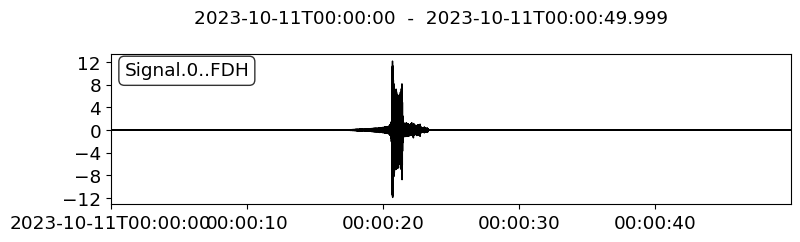

In [7]:
tr_new_.plot();

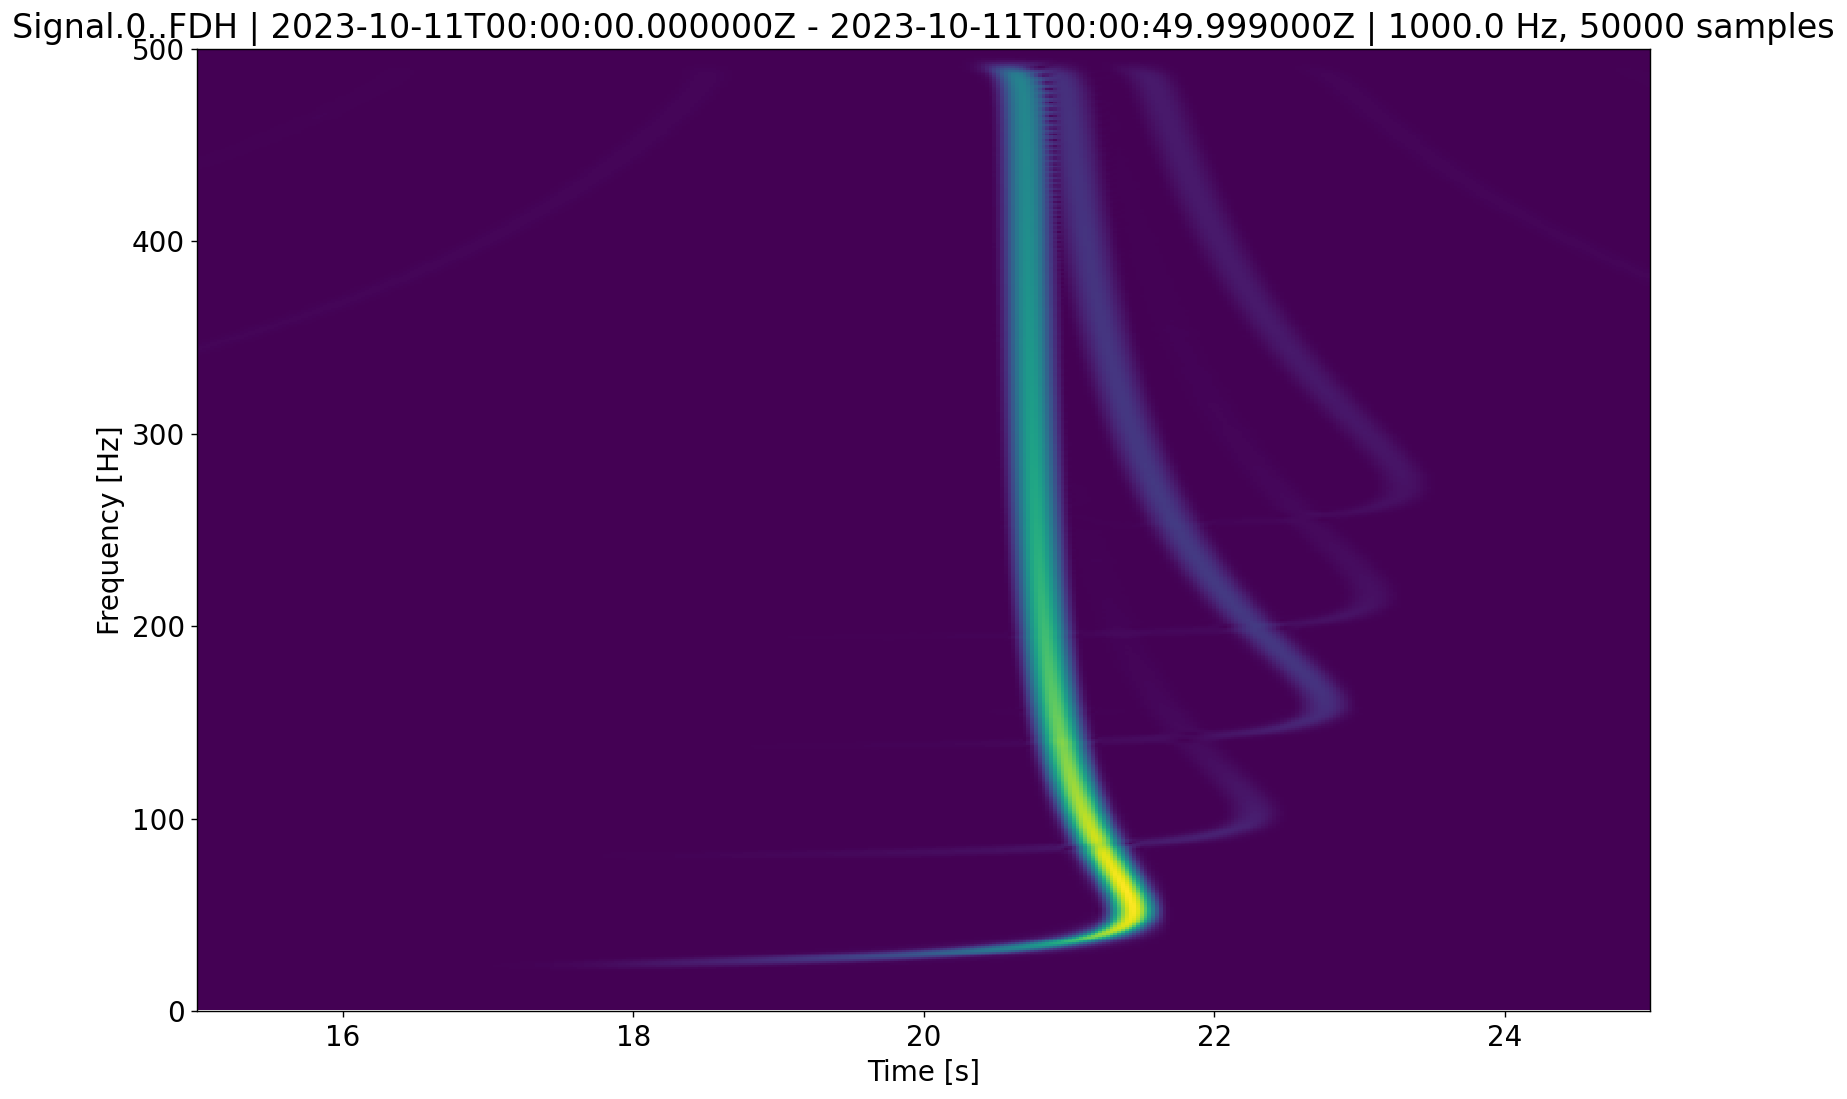

In [8]:
fig = tr_new_.spectrogram(wlen=0.5, per_lap=0.95, mult=2, log=False, dbscale=False, show=False);
fig.set_figheight(10)
fig.set_figwidth(15)
plt.ylim(0,500)
plt.xlim(15,25)
plt.show()

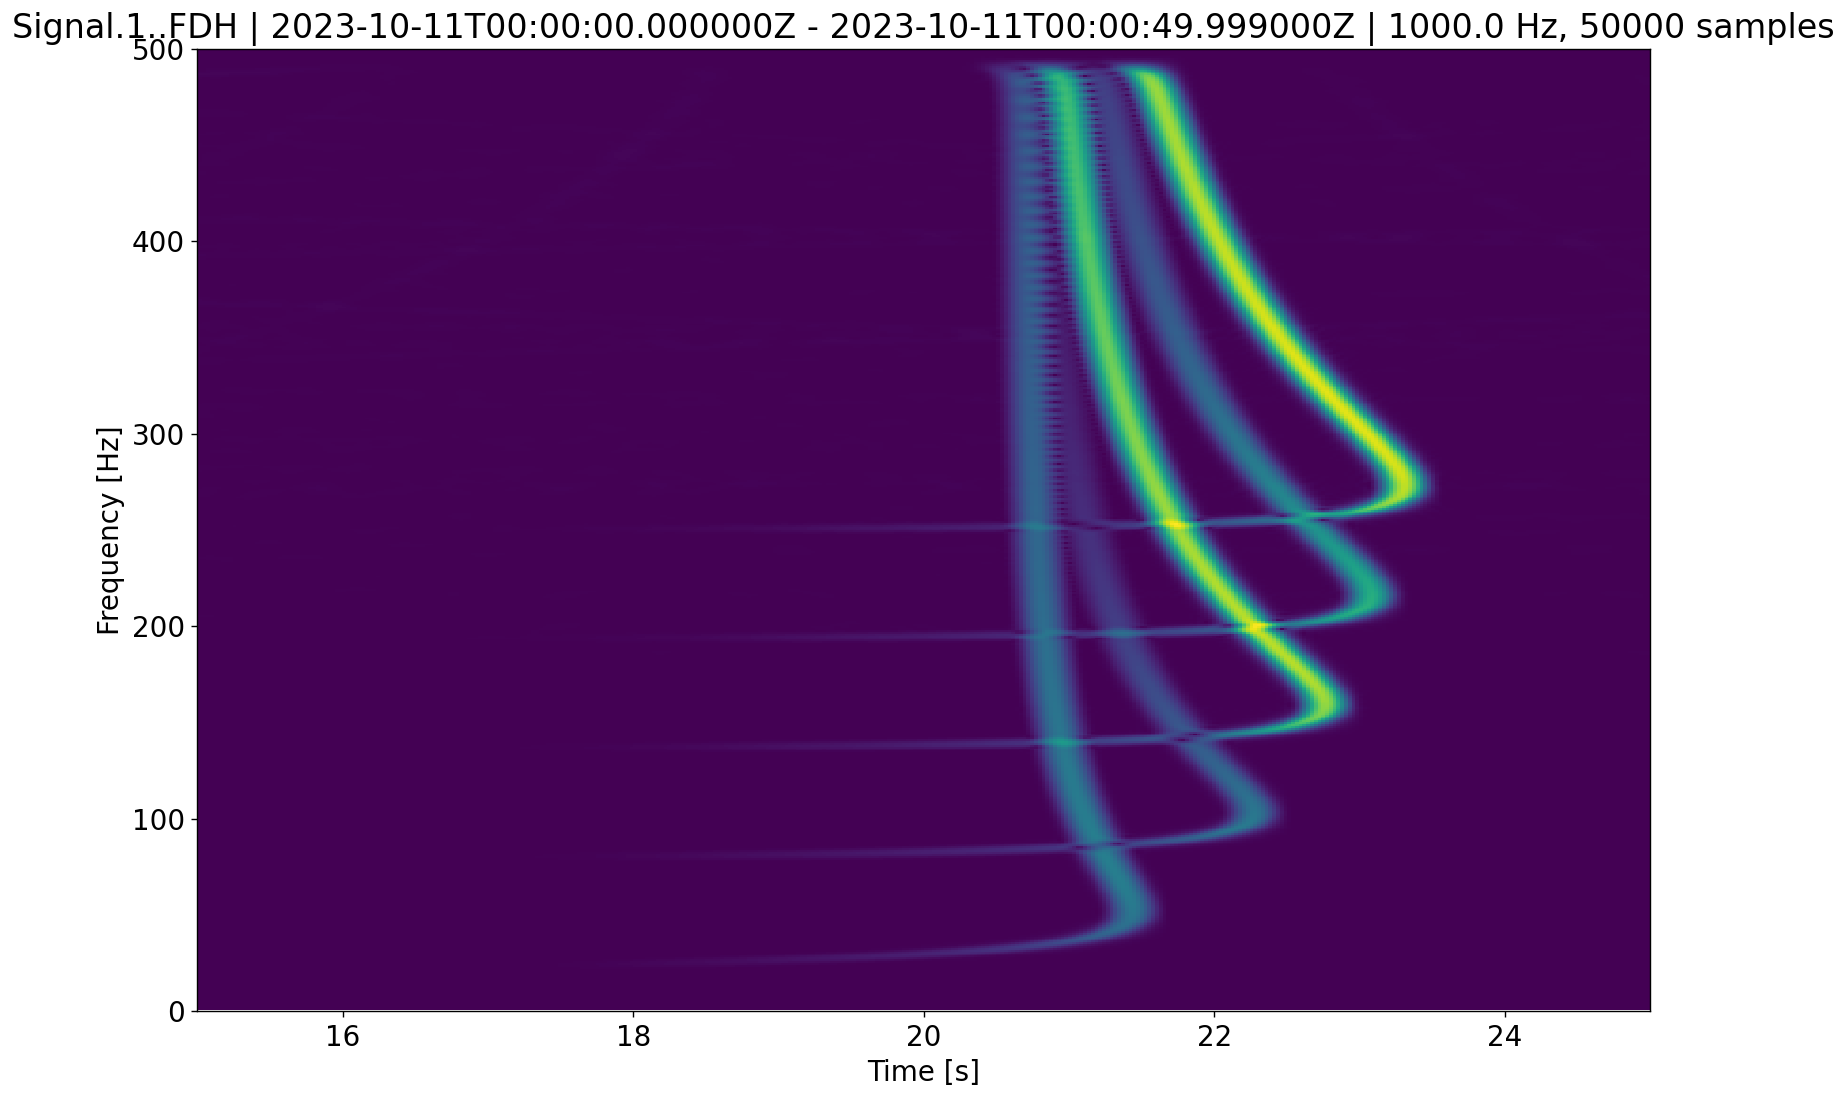

In [10]:
fig = st[1].spectrogram(wlen=0.5, per_lap=0.95, mult=2, log=False, dbscale=False, show=False);
fig.set_figheight(10)
fig.set_figwidth(15)
plt.ylim(0,500)
plt.xlim(15,25)
plt.show()

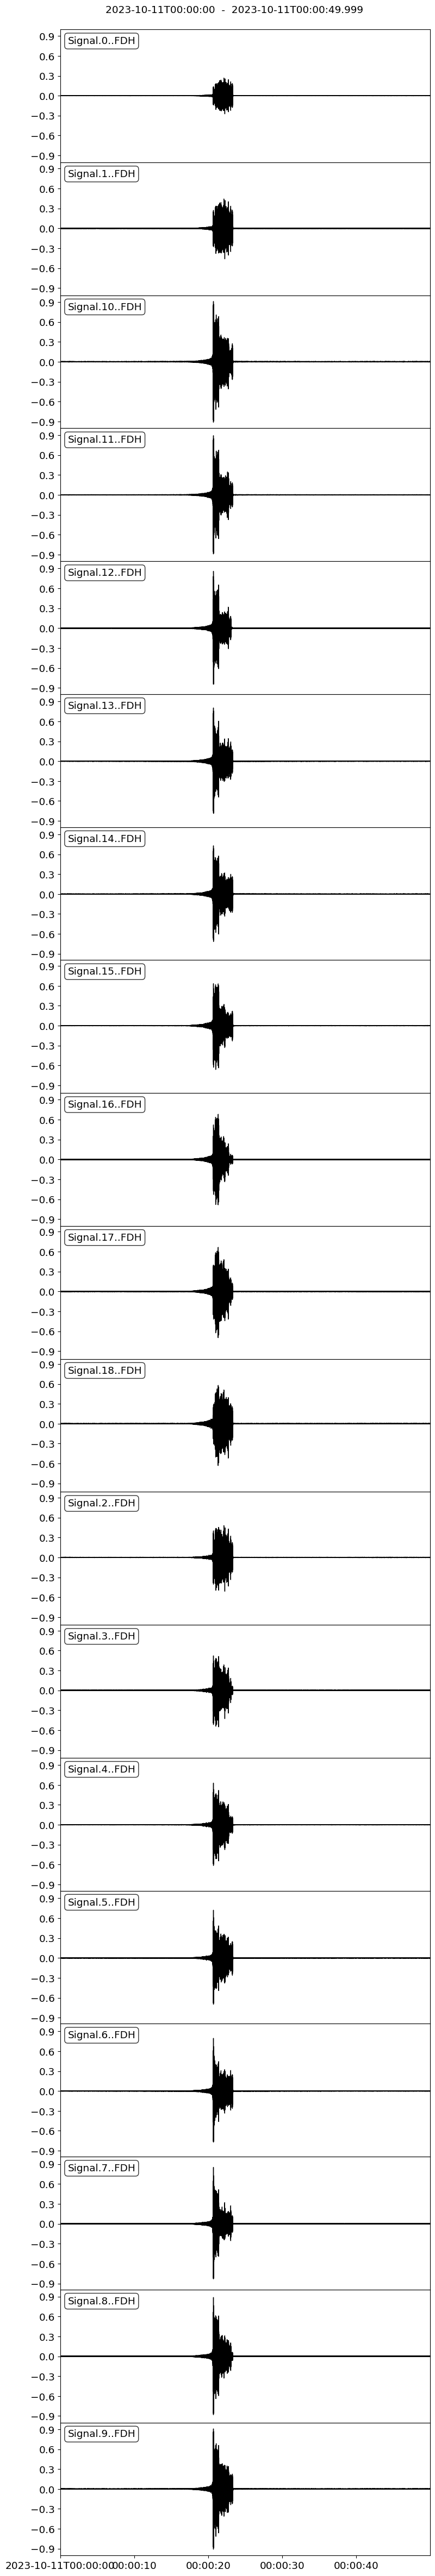

In [12]:
st.plot();